In [52]:
# Import packages required for matrix and graphic representations
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [53]:
# Data Loading

admissions = pd.read_csv('Admissions.csv')


#Removing "Unnamed" columns 
admissions= admissions[['admit', 'gre', 'gpa', 'rank']]

print ("Clean Size admissions", admissions.shape)

print("Type", type(admissions))

admissions.head()

Clean Size admissions (400, 4)
Type <class 'pandas.core.frame.DataFrame'>


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [54]:
admissions.info() # variables included in the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [55]:
# Cheking NaN /null values
admissions.isnull().sum()*100/admissions.shape[0]


admit    0.0
gre      0.0
gpa      0.0
rank     0.0
dtype: float64

In [56]:
admissions.describe()  # Only numerical variables are presented

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [57]:
print(" admissions shape",admissions.shape)

#print(admissions.columns)


 admissions shape (400, 4)


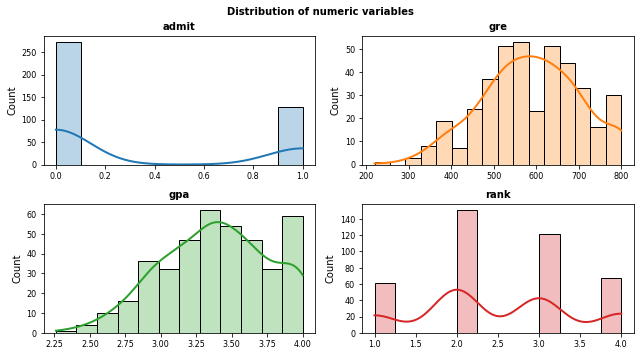

In [58]:
# Distribution of each variable
# ==============================================================================
# Fit number of subplots to the number of columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
#col_numeric = admissions.select_dtypes(include=['float64', 'int']).columns # when only numeric coluns are selected

col_numeric = admissions.columns

for i, colum in enumerate(col_numeric):
    sns.histplot(
        data    = admissions,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution of numeric variables', fontsize = 10, fontweight = "bold");

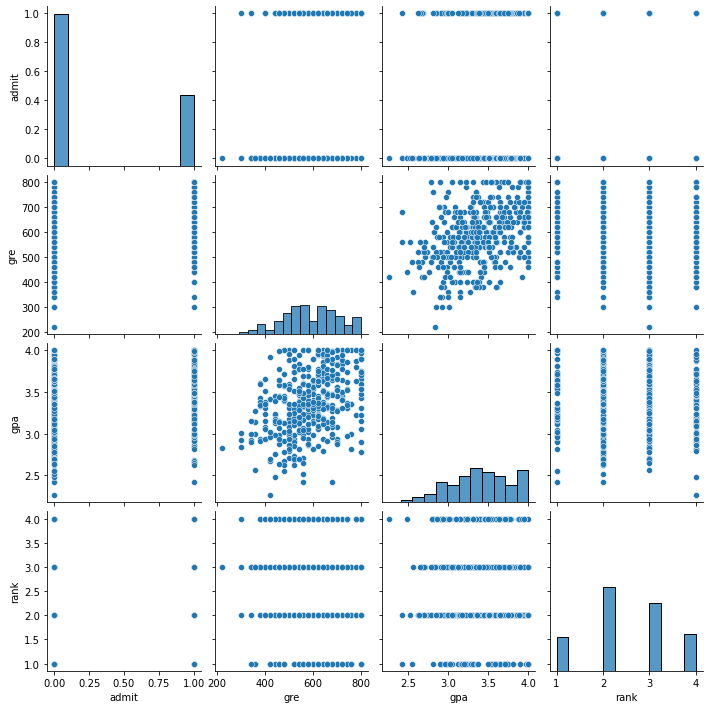

In [59]:
# plot numerical data as pairs
sns.pairplot(admissions);

In [60]:
# count of each category value
print(admissions["rank"].value_counts())


rankd = pd.Series(list(admissions['rank']))

rankd=pd.get_dummies(rankd, drop_first=True)  # drop_first removes 0 values leaving k-1 levels

# Alternative way keeping the whole dataframe
#rankd=pd.get_dummies(salaries, columns=['sex','rank'], prefix="dmy",drop_first=True)  # drop_first removes 0 values leaving k-1 levels

#print("\n \n",rankd)

2    151
3    121
4     67
1     61
Name: rank, dtype: int64


In [61]:
# Creation of dummines for the variable rank
data=pd.get_dummies(admissions, columns=['rank'], prefix="dmy",drop_first=True)  # drop_first removes 0 values leaving k-1 levels

data.head()



,admit,gre,gpa,dmy_2,dmy_3,dmy_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [62]:
#Creatioin of variables for model
Y=data['admit']

#X = data.filter(['col_name_1', 'col_name_2'])
X=data.filter(['gre', 'gpa', 'dmy_2', 'dmy_3', 'dmy_4'])

In [63]:
import statsmodels.api as sm

# Fit the logistic resgression line using ‘logit’
model = sm.Logit(Y,sm.add_constant(X)).fit()

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Tue, 20 Jun 2023   Pseudo R-squ.:                 0.08292
Time:                        14:45:27   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9900      1.140     -3.500      0.000      -6.224      -1.756
gre            0.0023      0.

In [64]:
#Now,observe the output of model for another view
model.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.083     
Dependent Variable: admit            AIC:              470.5175  
Date:               2023-06-20 14:45 BIC:              494.4663  
No. Observations:   400              Log-Likelihood:   -229.26   
Df Model:           5                LL-Null:          -249.99   
Df Residuals:       394              LLR p-value:      7.5782e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -3.9900     1.1400   -3.5001   0.0005   -6.2242   -1.7557
gre        0.0023     0.0011    2.0699   0.0385    0.0001    0.0044
gpa        0.8040     0.3318    2.4231   0.0154    0.1537    1.4544
dmy_2     -0.6754     0.3165   -2.1342   0.0328   -1.2958   -0.0551
dmy_3     -1.3402     0.3453   -3.8812   0.0001   -2.0170   -0.6634
dmy_4     -1.5515     0.4178   -3.7131   0.0002   -2.3704   -0.7325
=================================================================

"""

In [65]:
# Prediction using the model 
y_pred_df = pd.DataFrame({'actual':Y,'predicted_prob':model.predict(exog=sm.add_constant(X))})
y_pred_df

,actual,predicted_prob
0,0,0.172627
1,1,0.292175
2,1,0.738408
3,1,0.178385
4,0,0.118354
...,...,...
395,0,0.488670
396,0,0.165504
397,0,0.181062
398,0,0.463667


In [66]:
#Now sort predicted probabilities  in  descending order
y_pred_df = pd.DataFrame({'actual':Y,'predicted_prob':model.predict(exog=sm.add_constant(X))})
sorted_predict_df = y_pred_df[['predicted_prob',
                               'actual']].sort_values('predicted_prob',
                                                                       ascending = False)
sorted_predict_df 

,predicted_prob,actual
2,0.738408,1
293,0.733722,0
12,0.720539,1
150,0.696072,1
69,0.694368,0
...,...,...
17,0.078953,0
71,0.074860,0
48,0.072354,0
304,0.071985,0


In [67]:
num_per_decile = int(len(sorted_predict_df)/10)
print("Number of observation per decile: ",num_per_decile)

Number of observation per decile:  40


In [68]:
#Function to get decile(split data into ten equal parts)
def get_deciles(df):
    df['decile']=1
    idx = 0
    for each_d in range(0,10):
        df.iloc[idx:idx+num_per_decile,df.columns.get_loc('decile')]= each_d
        idx += num_per_decile
    df['decile'] = df['decile']+1
    return df

In [69]:
deciles_predict_df = get_deciles(sorted_predict_df)
deciles_predict_df

,predicted_prob,actual,decile
2,0.738408,1,1
293,0.733722,0,1
12,0.720539,1,1
150,0.696072,1,1
69,0.694368,0,1
...,...,...,...
17,0.078953,0,10
71,0.074860,0,10
48,0.072354,0,10
304,0.071985,0,10


In [70]:
gain_lift_df= pd.DataFrame(deciles_predict_df.groupby('decile')['actual'].sum()).reset_index()
gain_lift_df.columns = ['decile','gain']
gain_lift_df

,decile,gain
0,1,24
1,2,19
2,3,21
3,4,11
4,5,12
5,6,9
6,7,8
7,8,14
8,9,5
9,10,4


In [71]:
gain_lift_df['gain_percentage']=(100 * gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())
gain_lift_df


,decile,gain,gain_percentage
0,1,24,18.897638
1,2,19,33.858268
2,3,21,50.393701
3,4,11,59.055118
4,5,12,68.503937
5,6,9,75.590551
6,7,8,81.889764
7,8,14,92.913386
8,9,5,96.850394
9,10,4,100.000000


In [72]:
#Above you notice that more than 70% subscribers are found in first six deciles

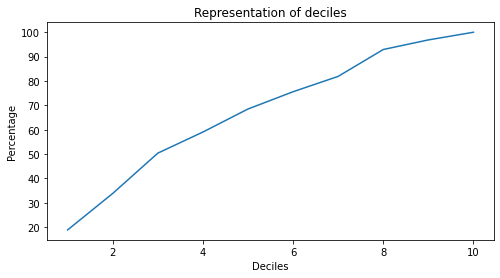

In [73]:
plt.figure(figsize = (8,4))
plt.plot(gain_lift_df['decile'],gain_lift_df['gain_percentage'],'-')
plt.xlabel('Deciles')
plt.ylabel('Percentage')
plt.title('Representation of deciles')
plt.show()


In [74]:
#Now,calculate lift to see how good deciles are
gain_lift_df['lift']= (gain_lift_df.gain_percentage/(gain_lift_df.decile * 10))
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,24,18.897638,1.889764
1,2,19,33.858268,1.692913
2,3,21,50.393701,1.679790
3,4,11,59.055118,1.476378
4,5,12,68.503937,1.370079
5,6,9,75.590551,1.259843
6,7,8,81.889764,1.169854
7,8,14,92.913386,1.161417
8,9,5,96.850394,1.076115
9,10,4,100.000000,1.000000


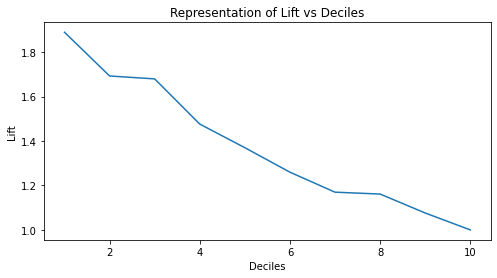

In [75]:
plt.figure(figsize=(8,4))
plt.plot(gain_lift_df['decile'],gain_lift_df['lift'],'-')
plt.xlabel('Deciles')
plt.ylabel('Lift')
plt.title('Representation of Lift vs Deciles')
plt.show()


In [76]:
#Developing model using Logistic Regression SKLearn Package
from sklearn.linear_model import LogisticRegression

In [77]:
logit = LogisticRegression()
#Fitting model with X and Y values of dataset
logit.fit(X,Y)

LogisticRegression()

In [88]:
pred_y = logit.predict_proba(X)
pred_y[0:6,]  # probabilty of each class


array([[0.82502055, 0.17497945],
       [0.69830844, 0.30169156],
       [0.30346652, 0.69653348],
       [0.80251107, 0.19748893],
       [0.86707922, 0.13292078],
       [0.61315912, 0.38684088]])

In [79]:
type(pred_y)

numpy.ndarray

In [80]:
y_pred_df_new = pd.DataFrame({'actual':Y,'predicted_prob': pred_y[:,1]})
y_pred_df_new.head()


,actual,predicted_prob
0,0,0.174979
1,1,0.301692
2,1,0.696533
3,1,0.197489
4,0,0.132921


In [81]:
sorted_predict_df_new = y_pred_df_new[['predicted_prob','actual']].sort_values('predicted_prob',ascending =False)
deciles_predict_df_new = get_deciles(sorted_predict_df_new)
deciles_predict_df_new[0:20]

,predicted_prob,actual,decile
2,0.696533,1,1
293,0.691957,0,1
12,0.675981,1,1
150,0.655650,1,1
69,0.654026,0,1
118,0.649131,1,1
202,0.643857,1,1
14,0.643857,1,1
165,0.643857,0,1
25,0.642555,1,1


In [82]:
gain_lift_df_new = pd.DataFrame(deciles_predict_df_new.groupby('decile')['actual'].sum()).reset_index()
gain_lift_df_new.columns = ['decile','gain']
gain_lift_df_new['gain_percentage']=(100*gain_lift_df_new.gain.cumsum()/gain_lift_df_new.gain.sum())
gain_lift_df_new

,decile,gain,gain_percentage
0,1,23,18.110236
1,2,24,37.007874
2,3,16,49.606299
3,4,11,58.267717
4,5,14,69.291339
5,6,9,76.377953
6,7,7,81.889764
7,8,13,92.125984
8,9,6,96.850394
9,10,4,100.000000


In [83]:
gain_lift_df_new['lift']=(gain_lift_df_new.gain_percentage / (gain_lift_df_new.decile * 10))
gain_lift_df_new

,decile,gain,gain_percentage,lift
0,1,23,18.110236,1.811024
1,2,24,37.007874,1.850394
2,3,16,49.606299,1.653543
3,4,11,58.267717,1.456693
4,5,14,69.291339,1.385827
5,6,9,76.377953,1.272966
6,7,7,81.889764,1.169854
7,8,13,92.125984,1.151575
8,9,6,96.850394,1.076115
9,10,4,100.000000,1.000000


In [84]:
#We can also calculate Lift and Gain curves by just writting a single line of code 


<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

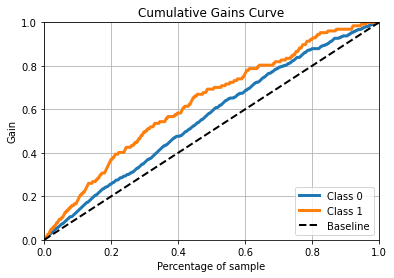

In [85]:
import scikitplot as skplt
#following line is used to find Gains Curve
skplt.metrics.plot_cumulative_gain(Y,pred_y)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

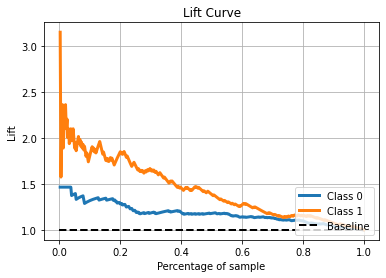

In [86]:
#Following line is used to find Lift curve
skplt.metrics.plot_lift_curve(Y,pred_y)

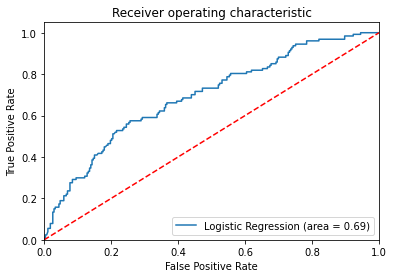

AUC: 0.693


In [87]:
#Libraries required for ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# ROC curve for the dataset
logit_roc_auc = roc_auc_score(Y, model.predict(exog = sm.add_constant(X))) # AUC estimatiion
fpr, tpr, thresholds = roc_curve(Y, model.predict(exog = sm.add_constant(X)))  #ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

...
# calculate AUC
auc = roc_auc_score(Y, model.predict(exog = sm.add_constant(X)))
print('AUC: %.3f' % auc)